# Estudo TWITTER API 

Neste Notebook você encontrará uma análise do dataset sentiment140 dataset, cujo objetivo foi analisar dois temas principais: 
>- **Análise de sentimentos** o dataset já está classificado
>- **Tokenização de palavras e nomeação de entidades** na cidade de São Paulo - Brasil e que possuem acessibilidade para pessoas cadeirantes 

![Img AltText](https://t2.tudocdn.net/376633?w=1200&h=1200)

## Context
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

## Content
It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)



## IMPORTAÇÕES

In [1]:
import pandas as pd
import requests, time


In [2]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manga\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\manga\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\manga\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manga\AppData\Roaming\nltk_data...
[nltk_data]   Package ave

True

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from collections import Counter

## ANÁLISES E LIMPEZAS

In [12]:
df = pd.read_csv('twitter.csv',header=None, encoding='ISO-8859-1')

In [13]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
df.describe()

,0,1
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [67]:
##nomeando as colunas
df = pd.DataFrame(df.values, columns=['polarity', 'ids','date','flag','user','twitte' ])

In [68]:
df

,polarity,ids,date,flag,user,twitte
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [69]:
valores_unicos_flag = df['flag'].unique()
valores_unicos_flag

array(['NO_QUERY'], dtype=object)

In [70]:
valores_unicos_polarity = df['polarity'].unique()
valores_unicos_polarity

array([0, 4], dtype=object)

In [71]:
valores_unicos_polarity = df['user'].unique()
valores_unicos_polarity

array(['_TheSpecialOne_', 'scotthamilton', 'mattycus', ..., 'EvolveTom',
       'AmandaMarie1028', 'bpbabe'], dtype=object)

In [72]:
## vamos eliminar todos os twites que contenham @, para eliminarmos os comentários que talvez contenham piadas internas, histórias entre pessoas que não façam sentido 

new_df = df[~df['twitte'].str.contains("@")]

# Verificando o novo DataFrame
new_df


,polarity,ids,date,flag,user,twitte
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
10,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing
11,0,1467812579,Mon Apr 06 22:20:17 PDT 2009,NO_QUERY,pardonlauren,I just re-pierced my ears
...,...,...,...,...,...,...
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...


In [73]:
new_df.shape

(853568, 6)

In [74]:
## vamos eliminar todos os twittes que contenham links 
import re

# Regex para verificar se a string contém um link
link_regex = r'http\S+|www.\S+'

# Criando uma cópia do DataFrame original
clean_df = new_df.copy()

# Eliminando as linhas que contêm links
clean_df = clean_df[~clean_df['twitte'].str.contains(link_regex)]

# Verificando o número de linhas eliminadas
num_links = len(new_df) - len(clean_df)
print(f"Eliminadas {num_links} linhas que contêm links.")


Eliminadas 51280 linhas que contêm links.


In [75]:
clean_df.shape

(802288, 6)

In [76]:
##vamos eliminar os twittes que contenham caracteres especiais 
import re

## Criando uma segunda cópia do DataFrame anterior
clean_df2 = clean_df.copy()

# definindo a expressão regular para encontrar emojis e símbolos
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # símbolos e pictogramas
                           u"\U0001F680-\U0001F6FF"  # transporte e símbolos de mapas
                           u"\U0001F1E0-\U0001F1FF"  # bandeiras (iOS)
                           u"\U00002702-\U000027B0"  # outros símbolos
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)

# removendo emojis e símbolos da coluna 'twitte'
clean_df2['twitte'] = clean_df2['twitte'].apply(lambda x: emoji_pattern.sub(r'', x))
clean_df2


,polarity,ids,date,flag,user,twitte
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
10,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing
11,0,1467812579,Mon Apr 06 22:20:17 PDT 2009,NO_QUERY,pardonlauren,I just re-pierced my ears
...,...,...,...,...,...,...
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...


In [77]:
clean_df2.shape

(802288, 6)

In [78]:
df_sem_stop_words = clean_df2.copy() 
df_sem_stop_words

,polarity,ids,date,flag,user,twitte
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
10,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing
11,0,1467812579,Mon Apr 06 22:20:17 PDT 2009,NO_QUERY,pardonlauren,I just re-pierced my ears
...,...,...,...,...,...,...
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...


In [79]:
from nltk.corpus import stopwords

# carregando as stop words em português
stop_words = set(stopwords.words('english'))

# removendo as stop words da coluna 'twitte'
df_sem_stop_words['twitte'] = df_sem_stop_words['twitte'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df_sem_stop_words

,polarity,ids,date,flag,user,twitte
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset can't update Facebook texting it... migh...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need hug
10,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break plain city... snowing
11,0,1467812579,Mon Apr 06 22:20:17 PDT 2009,NO_QUERY,pardonlauren,re-pierced ears
...,...,...,...,...,...,...
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox back
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg lOnG wEeKeNd
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,woke up. school best feeling ever
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,ready MoJo Makeover? Ask details


In [80]:
df3 = df_sem_stop_words.copy() 
df3

,polarity,ids,date,flag,user,twitte
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset can't update Facebook texting it... migh...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need hug
10,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break plain city... snowing
11,0,1467812579,Mon Apr 06 22:20:17 PDT 2009,NO_QUERY,pardonlauren,re-pierced ears
...,...,...,...,...,...,...
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox back
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg lOnG wEeKeNd
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,woke up. school best feeling ever
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,ready MoJo Makeover? Ask details


In [81]:
df3['date'] = df3['date'].str.replace(' PDT ', ' ')
df3

,polarity,ids,date,flag,user,twitte
1,0,1467810672,Mon Apr 06 22:19:49 2009,NO_QUERY,scotthamilton,upset can't update Facebook texting it... migh...
3,0,1467811184,Mon Apr 06 22:19:57 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
6,0,1467811592,Mon Apr 06 22:20:03 2009,NO_QUERY,mybirch,Need hug
10,0,1467812416,Mon Apr 06 22:20:16 2009,NO_QUERY,erinx3leannexo,spring break plain city... snowing
11,0,1467812579,Mon Apr 06 22:20:17 2009,NO_QUERY,pardonlauren,re-pierced ears
...,...,...,...,...,...,...
1599990,4,2193579249,Tue Jun 16 08:38:59 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox back
1599992,4,2193579434,Tue Jun 16 08:39:00 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg lOnG wEeKeNd
1599995,4,2193601966,Tue Jun 16 08:40:49 2009,NO_QUERY,AmandaMarie1028,woke up. school best feeling ever
1599997,4,2193601991,Tue Jun 16 08:40:49 2009,NO_QUERY,bpbabe,ready MoJo Makeover? Ask details


In [82]:
df3['date'] = pd.to_datetime(df3['date'], format='%a %b %d %H:%M:%S %Y', errors='coerce').dt.date
df3

,polarity,ids,date,flag,user,twitte
1,0,1467810672,2009-04-06,NO_QUERY,scotthamilton,upset can't update Facebook texting it... migh...
3,0,1467811184,2009-04-06,NO_QUERY,ElleCTF,whole body feels itchy like fire
6,0,1467811592,2009-04-06,NO_QUERY,mybirch,Need hug
10,0,1467812416,2009-04-06,NO_QUERY,erinx3leannexo,spring break plain city... snowing
11,0,1467812579,2009-04-06,NO_QUERY,pardonlauren,re-pierced ears
...,...,...,...,...,...,...
1599990,4,2193579249,2009-06-16,NO_QUERY,razzberry5594,WOOOOO! Xbox back
1599992,4,2193579434,2009-06-16,NO_QUERY,sdancingsteph,ReCoVeRiNg lOnG wEeKeNd
1599995,4,2193601966,2009-06-16,NO_QUERY,AmandaMarie1028,woke up. school best feeling ever
1599997,4,2193601991,2009-06-16,NO_QUERY,bpbabe,ready MoJo Makeover? Ask details


In [83]:
df3 = df3.drop('flag', axis=1)
df3

,polarity,ids,date,user,twitte
1,0,1467810672,2009-04-06,scotthamilton,upset can't update Facebook texting it... migh...
3,0,1467811184,2009-04-06,ElleCTF,whole body feels itchy like fire
6,0,1467811592,2009-04-06,mybirch,Need hug
10,0,1467812416,2009-04-06,erinx3leannexo,spring break plain city... snowing
11,0,1467812579,2009-04-06,pardonlauren,re-pierced ears
...,...,...,...,...,...
1599990,4,2193579249,2009-06-16,razzberry5594,WOOOOO! Xbox back
1599992,4,2193579434,2009-06-16,sdancingsteph,ReCoVeRiNg lOnG wEeKeNd
1599995,4,2193601966,2009-06-16,AmandaMarie1028,woke up. school best feeling ever
1599997,4,2193601991,2009-06-16,bpbabe,ready MoJo Makeover? Ask details


## LEITURAS

Existem muitas análises que podem ser úteis para extrair informações de grandes conjuntos de dados de texto. Aqui estão algumas ideias:

Análise de sentimentos: A análise de sentimentos pode ser usada para identificar a polaridade do sentimento expresso em um texto. Isso pode ser útil para entender a opinião das pessoas sobre determinado assunto, produto ou serviço. A análise de sentimentos geralmente envolve a classificação do texto como positivo, negativo ou neutro.

Análise de tópicos: A análise de tópicos pode ser usada para identificar os principais temas ou tópicos em um conjunto de dados de texto. Isso pode ser útil para entender o que as pessoas estão falando e quais são as principais preocupações em determinado assunto. A análise de tópicos geralmente envolve a identificação de palavras ou frases frequentes que estão relacionadas a determinado tópico.

Análise de redes sociais: A análise de redes sociais pode ser usada para entender as conexões entre os usuários de uma plataforma de rede social. Isso pode ser útil para identificar influenciadores ou líderes de opinião e entender como as informações se espalham através das redes sociais.

Identificação de padrões: A identificação de padrões pode ser usada para encontrar relações entre diferentes palavras, frases ou conceitos em um conjunto de dados de texto. Isso pode ser útil para identificar tendências ou padrões de comportamento em determinado grupo de pessoas.

Análise de entidades nomeadas: Como mencionado anteriormente, a análise de entidades nomeadas pode ser usada para identificar nomes de pessoas, organizações, lugares, produtos e obras de arte em um conjunto de dados de texto. Isso pode ser útil para entender quais são as principais entidades mencionadas e como elas se relacionam.

Essas são apenas algumas das análises que podem ser úteis para extrair informações de grandes conjuntos de dados de texto. É importante lembrar que a escolha da análise certa depende do objetivo da sua análise e do tipo de texto que você está analisando.

## 1 | Criando Samples 

In [91]:
df3['date'] = pd.to_datetime(df3['date'])
df3

,polarity,ids,date,user,twitte
1,0,1467810672,2009-04-06,scotthamilton,upset can't update Facebook texting it... migh...
3,0,1467811184,2009-04-06,ElleCTF,whole body feels itchy like fire
6,0,1467811592,2009-04-06,mybirch,Need hug
10,0,1467812416,2009-04-06,erinx3leannexo,spring break plain city... snowing
11,0,1467812579,2009-04-06,pardonlauren,re-pierced ears
...,...,...,...,...,...
1599990,4,2193579249,2009-06-16,razzberry5594,WOOOOO! Xbox back
1599992,4,2193579434,2009-06-16,sdancingsteph,ReCoVeRiNg lOnG wEeKeNd
1599995,4,2193601966,2009-06-16,AmandaMarie1028,woke up. school best feeling ever
1599997,4,2193601991,2009-06-16,bpbabe,ready MoJo Makeover? Ask details


In [92]:
df4=df3.copy()

In [93]:
df4

,polarity,ids,date,user,twitte
1,0,1467810672,2009-04-06,scotthamilton,upset can't update Facebook texting it... migh...
3,0,1467811184,2009-04-06,ElleCTF,whole body feels itchy like fire
6,0,1467811592,2009-04-06,mybirch,Need hug
10,0,1467812416,2009-04-06,erinx3leannexo,spring break plain city... snowing
11,0,1467812579,2009-04-06,pardonlauren,re-pierced ears
...,...,...,...,...,...
1599990,4,2193579249,2009-06-16,razzberry5594,WOOOOO! Xbox back
1599992,4,2193579434,2009-06-16,sdancingsteph,ReCoVeRiNg lOnG wEeKeNd
1599995,4,2193601966,2009-06-16,AmandaMarie1028,woke up. school best feeling ever
1599997,4,2193601991,2009-06-16,bpbabe,ready MoJo Makeover? Ask details


In [95]:
df_sampled = df4.iloc[::4].sample(frac=1)
df_sampled

,polarity,ids,date,user,twitte
178414,0,1965963225,2009-05-29,zMessenjah,&quot;Monarchy&quot; gonna bleed us dry! nothi...
40420,0,1573781866,2009-04-21,CathBx,twitter account quiet? like anymore??
1301580,4,2007640627,2009-06-02,ricekel,Bridget's twit
1510751,4,2174997755,2009-06-14,MeganRaeRae,Watching tv jaz jess. Sooo bored! Gah! Come ch...
194648,0,1970331832,2009-05-30,MatthewRimmer,Pink Fun Day work. I'm wearing pink polo shirt...
...,...,...,...,...,...
432687,0,2064802884,2009-06-07,Daniel_H123,another day revision...
1324503,4,2015017763,2009-06-03,Allyxwithlove,whiter teeth &amp; red hair. well burgundy rea...
395944,0,2056234118,2009-06-06,Jinte,"Shit, artikel rejected"
593021,0,2218128745,2009-06-17,CierraPayne,"pray carley. man think memories together, hear..."


## 2 | Nomeando entidades 

In [96]:
df_sampled['twitte_tokens'] = df_sampled['twitte'].apply(word_tokenize)
df_sampled

,polarity,ids,date,user,twitte,twitte_tokens
178414,0,1965963225,2009-05-29,zMessenjah,&quot;Monarchy&quot; gonna bleed us dry! nothi...,"[&, quot, ;, Monarchy, &, quot, ;, gon, na, bl..."
40420,0,1573781866,2009-04-21,CathBx,twitter account quiet? like anymore??,"[twitter, account, quiet, ?, like, anymore, ?, ?]"
1301580,4,2007640627,2009-06-02,ricekel,Bridget's twit,"[Bridget, 's, twit]"
1510751,4,2174997755,2009-06-14,MeganRaeRae,Watching tv jaz jess. Sooo bored! Gah! Come ch...,"[Watching, tv, jaz, jess, ., Sooo, bored, !, G..."
194648,0,1970331832,2009-05-30,MatthewRimmer,Pink Fun Day work. I'm wearing pink polo shirt...,"[Pink, Fun, Day, work, ., I, 'm, wearing, pink..."
...,...,...,...,...,...,...
432687,0,2064802884,2009-06-07,Daniel_H123,another day revision...,"[another, day, revision, ...]"
1324503,4,2015017763,2009-06-03,Allyxwithlove,whiter teeth &amp; red hair. well burgundy rea...,"[whiter, teeth, &, amp, ;, red, hair, ., well,..."
395944,0,2056234118,2009-06-06,Jinte,"Shit, artikel rejected","[Shit, ,, artikel, rejected]"
593021,0,2218128745,2009-06-17,CierraPayne,"pray carley. man think memories together, hear...","[pray, carley, ., man, think, memories, togeth..."


In [97]:
df_sampled['twitte_pos'] = df_sampled['twitte_tokens'].apply(pos_tag)
df_sampled

,polarity,ids,date,user,twitte,twitte_tokens,twitte_pos
178414,0,1965963225,2009-05-29,zMessenjah,&quot;Monarchy&quot; gonna bleed us dry! nothi...,"[&, quot, ;, Monarchy, &, quot, ;, gon, na, bl...","[(&, CC), (quot, NN), (;, :), (Monarchy, NNP),..."
40420,0,1573781866,2009-04-21,CathBx,twitter account quiet? like anymore??,"[twitter, account, quiet, ?, like, anymore, ?, ?]","[(twitter, NN), (account, NN), (quiet, JJ), (?..."
1301580,4,2007640627,2009-06-02,ricekel,Bridget's twit,"[Bridget, 's, twit]","[(Bridget, NNP), ('s, POS), (twit, NN)]"
1510751,4,2174997755,2009-06-14,MeganRaeRae,Watching tv jaz jess. Sooo bored! Gah! Come ch...,"[Watching, tv, jaz, jess, ., Sooo, bored, !, G...","[(Watching, VBG), (tv, NN), (jaz, NN), (jess, ..."
194648,0,1970331832,2009-05-30,MatthewRimmer,Pink Fun Day work. I'm wearing pink polo shirt...,"[Pink, Fun, Day, work, ., I, 'm, wearing, pink...","[(Pink, NNP), (Fun, NNP), (Day, NNP), (work, N..."
...,...,...,...,...,...,...,...
432687,0,2064802884,2009-06-07,Daniel_H123,another day revision...,"[another, day, revision, ...]","[(another, DT), (day, NN), (revision, NN), (....."
1324503,4,2015017763,2009-06-03,Allyxwithlove,whiter teeth &amp; red hair. well burgundy rea...,"[whiter, teeth, &, amp, ;, red, hair, ., well,...","[(whiter, NN), (teeth, NN), (&, CC), (amp, NN)..."
395944,0,2056234118,2009-06-06,Jinte,"Shit, artikel rejected","[Shit, ,, artikel, rejected]","[(Shit, NNP), (,, ,), (artikel, RB), (rejected..."
593021,0,2218128745,2009-06-17,CierraPayne,"pray carley. man think memories together, hear...","[pray, carley, ., man, think, memories, togeth...","[(pray, NN), (carley, NN), (., .), (man, NN), ..."


In [98]:
df_sampled['twitte_entities'] = df_sampled['twitte_pos'].apply(ne_chunk)


In [101]:
df_sampled

,polarity,ids,date,user,twitte,twitte_tokens,twitte_pos,twitte_entities
178414,0,1965963225,2009-05-29,zMessenjah,&quot;Monarchy&quot; gonna bleed us dry! nothing slaves pigs D.C. reconize country anymore!,"[&, quot, ;, Monarchy, &, quot, ;, gon, na, bleed, us, dry, !, nothing, slaves, pigs, D.C., reconize, country, anymore, !]","[(&, CC), (quot, NN), (;, :), (Monarchy, NNP), (&, CC), (quot, NN), (;, :), (gon, CC), (na, TO), (bleed, VB), (us, PRP), (dry, JJ), (!, .), (nothing, NN), (slaves, NNS), (pigs, VBP), (D.C., NNP), (reconize, VB), (country, NN), (anymore, RB), (!, .)]","[(&, CC), (quot, NN), (;, :), [(Monarchy, NNP)], (&, CC), (quot, NN), (;, :), (gon, CC), (na, TO), (bleed, VB), (us, PRP), (dry, JJ), (!, .), (nothing, NN), (slaves, NNS), (pigs, VBP), (D.C., NNP), (reconize, VB), (country, NN), (anymore, RB), (!, .)]"
40420,0,1573781866,2009-04-21,CathBx,twitter account quiet? like anymore??,"[twitter, account, quiet, ?, like, anymore, ?, ?]","[(twitter, NN), (account, NN), (quiet, JJ), (?, .), (like, IN), (anymore, RB), (?, .), (?, .)]","[(twitter, NN), (account, NN), (quiet, JJ), (?, .), (like, IN), (anymore, RB), (?, .), (?, .)]"
1301580,4,2007640627,2009-06-02,ricekel,Bridget's twit,"[Bridget, 's, twit]","[(Bridget, NNP), ('s, POS), (twit, NN)]","[[(Bridget, NNP)], ('s, POS), (twit, NN)]"
1510751,4,2174997755,2009-06-14,MeganRaeRae,Watching tv jaz jess. Sooo bored! Gah! Come chilllll Tonight retro hella fun Bidwellll yes!,"[Watching, tv, jaz, jess, ., Sooo, bored, !, Gah, !, Come, chilllll, Tonight, retro, hella, fun, Bidwellll, yes, !]","[(Watching, VBG), (tv, NN), (jaz, NN), (jess, NN), (., .), (Sooo, NNP), (bored, VBD), (!, .), (Gah, NN), (!, .), (Come, NNP), (chilllll, NN), (Tonight, NNP), (retro, NN), (hella, NN), (fun, NN), (Bidwellll, NNP), (yes, UH), (!, .)]","[(Watching, VBG), (tv, NN), (jaz, NN), (jess, NN), (., .), [(Sooo, NNP)], (bored, VBD), (!, .), (Gah, NN), (!, .), (Come, NNP), (chilllll, NN), [(Tonight, NNP)], (retro, NN), (hella, NN), (fun, NN), [(Bidwellll, NNP)], (yes, UH), (!, .)]"
194648,0,1970331832,2009-05-30,MatthewRimmer,Pink Fun Day work. I'm wearing pink polo shirt saw shop yesterday. man's shirt - pink.,"[Pink, Fun, Day, work, ., I, 'm, wearing, pink, polo, shirt, saw, shop, yesterday, ., man, 's, shirt, -, pink, .]","[(Pink, NNP), (Fun, NNP), (Day, NNP), (work, NN), (., .), (I, PRP), ('m, VBP), (wearing, VBG), (pink, NN), (polo, NN), (shirt, NN), (saw, VBD), (shop, NN), (yesterday, NN), (., .), (man, NN), ('s, POS), (shirt, JJ), (-, :), (pink, NN), (., .)]","[[(Pink, NNP)], [(Fun, NNP)], (Day, NNP), (work, NN), (., .), (I, PRP), ('m, VBP), (wearing, VBG), (pink, NN), (polo, NN), (shirt, NN), (saw, VBD), (shop, NN), (yesterday, NN), (., .), (man, NN), ('s, POS), (shirt, JJ), (-, :), (pink, NN), (., .)]"
...,...,...,...,...,...,...,...,...
432687,0,2064802884,2009-06-07,Daniel_H123,another day revision...,"[another, day, revision, ...]","[(another, DT), (day, NN), (revision, NN), (..., :)]","[(another, DT), (day, NN), (revision, NN), (..., :)]"
1324503,4,2015017763,2009-06-03,Allyxwithlove,whiter teeth &amp; red hair. well burgundy really like OK mag &amp; need find nail polish?,"[whiter, teeth, &, amp, ;, red, hair, ., well, burgundy, really, like, OK, mag, &, amp, ;, need, find, nail, polish, ?]","[(whiter, NN), (teeth, NN), (&, CC), (amp, NN), (;, :), (red, JJ), (hair, NN), (., .), (well, RB), (burgundy, RB), (really, RB), (like, IN), (OK, NNP), (mag, NNP), (&, CC), (amp, NN), (;, :), (need, CC), (find, VB), (nail, JJ), (polish, NN), (?, .)]","[(whiter, NN), (teeth, NN), (&, CC), (amp, NN), (;, :), (red, JJ), (hair, NN), (., .), (well, RB), (burgundy, RB), (really, RB), (like, IN), [(OK, NNP)], (mag, NNP), (&, CC), (amp, NN), (;, :), (need, CC), (find, VB), (nail, JJ), (polish, NN), (?, .)]"
395944,0,2056234118,2009-06-06,Jinte,"Shit, artikel rejected","[Shit, ,, artikel, rejected]","[(Shit, NNP), (,, ,), (artikel, RB), (rejected, VBD)]","[[(Shit, NNP)], (,, ,), (artikel, RB), (rejecte

In [103]:
df_sampled.to_csv('dados.csv', index=False)

### DOCUMENTAÇÃO NLKT
Cada tupla na lista corresponde a um token do tweet e sua respectiva tag POS. No exemplo que você forneceu, a primeira tupla ('went', 'VBD') indica que o token 'went' é um verbo no passado (VBD), a segunda tupla ('km', 'NNS') indica que o token 'km' é um substantivo no plural (NNS), a terceira tupla ('run', 'VB') indica que o token 'run' é um verbo no infinitivo (VB), e assim por diante.

A tag POS indica a classe gramatical de cada token e é usada para análises sintáticas e semânticas. As tags POS possíveis dependem do sistema utilizado. No caso do NLTK, as tags POS seguem a convenção Penn Treebank e as principais tags são:

CC: conjunction
CD: cardinal digit
DT: determiner
EX: existential there
FW: foreign word
IN: preposition/subordinating conjunction
JJ: adjective
JJR: adjective, comparative
JJS: adjective, superlative
LS: list marker
MD: modal
NN: noun, singular
NNS: noun, plural

**NNP: proper noun, singular
NNPS: proper noun, plural**

PDT: predeterminer
POS: possessive ending
PRP: personal pronoun

PRP$: possessive pronoun

RB: adverb
RBR: adverb, comparative
RBS: adverb, superlative
RP: particle
SYM: symbol
TO: to
UH: interjection
VB: verb, base form
VBD: verb, past tense
VBG: verb, gerund/present participle
VBN: verb, past participle
VBP: verb, non-3rd person singular present
VBZ: verb, 3rd person singular present
WDT: wh-determiner
WP: wh-pronoun
WP$: possessive wh-pronoun
WRB: wh-adverb
É importante lembrar que, dependendo do corpus utilizado, pode haver variações nas tags e até mesmo o uso de tags específicas para o corpus.

### O que posso fazer após essa análise? 
Com a informação das tags POS, é possível realizar diversas análises linguísticas. Aqui estão alguns exemplos:

Contagem de palavras: você pode usar as tags para contar o número de palavras, substantivos, verbos, adjetivos, etc. Isso pode ser útil para entender melhor o conteúdo do texto e sua estrutura.

Análise de sentimentos: os adjetivos geralmente são usados para expressar emoções e opiniões. Analisar a frequência de adjetivos positivos e negativos pode ajudar a entender se o texto é mais positivo ou negativo.

Identificação de entidades: as tags POS também podem ajudar a identificar entidades, como nomes próprios, organizações e lugares. Isso pode ser útil para extrair informações de textos, como em análises de mídias sociais ou na detecção de notícias falsas.

Correção gramatical: as tags POS podem ajudar a identificar erros gramaticais, como concordância verbal ou nominal. Isso pode ser útil para melhorar a qualidade da escrita.

Tradução automática: as tags POS podem ser usadas em sistemas de tradução automática para ajudar a identificar o significado das palavras e a estrutura gramatical do texto.

Esses são apenas alguns exemplos das análises que podem ser feitas usando as tags POS. Cada aplicação pode ter suas próprias necessidades e objetivos específicos.

In [114]:
# importar as bibliotecas necessárias
from collections import Counter

# criar um contador para cada tipo de POS
nnp_counter = Counter()
nnps_counter = Counter()
nnpnnp_counter = Counter()

# iterar sobre cada linha do dataframe
for row in df_sampled.itertuples():
    # iterar sobre cada par (palavra, POS) na lista de POS da linha atual
    for word, pos in row.twitte_pos:
        # verificar se a POS é NNP, NNPS ou NNP+NNP
        if pos == 'NNP':
            nnp_counter[word] += 1
        elif pos == 'NNPS':
            nnps_counter[word] += 1
        elif pos == 'NNP+NNP':
            nnpnnp_counter[word] += 1
        elif pos == 'JJ':
            nnpnnp_counter[word] += 1   

# imprimir os resultados
print("NNP:")
print(nnp_counter.most_common(30))
print("\nNNPS:")
print(nnps_counter.most_common(30))
print("\nNNP+NNP:")
print(nnpnnp_counter.most_common(30))

print("\nJJ:")
print(nnpnnp_counter.most_common(30))

NNP:
[('..', 5051), ('....', 2058), ('*', 1485), ('Got', 1445), ('Im', 1378), ('Day', 1031), ('Twitter', 1020), ('Ca', 957), ('Sunday', 807), ('New', 797), ('Monday', 795), ('God', 783), ('Time', 732), ('Friday', 667), ('Ugh', 598), ('.....', 576), ('Love', 529), ('Damn', 525), ('Saturday', 509), ('Hope', 504), ('=', 497), ('Oh', 493), ('LOL', 490), ('Wow', 458), ('Gon', 449), ('Night', 443), ('OMG', 431), ('Great', 420), ('Thank', 406), ('Goodnight', 400)]

NNPS:
[('Brothers', 85), ('Days', 31), ('Philippines', 26), ('Lakers', 25), ('Congrats', 21), ('Thats', 18), ('Angels', 16), ('Tweets', 16), ('Times', 15), ('Americans', 15), ('States', 14), ('Seems', 12), ('Tweeties', 11), ('Indians', 11), ('Mothers', 11), ('BROTHERS', 11), ('Minutes', 8), ('Friends', 8), ('Transformers', 8), ('Nuggets', 8), ('Giants', 8), ('Topics', 7), ('Daisies', 7), ('Physics', 7), ('Iranians', 7), ('Rangers', 7), ('Tweeters', 7), ('Twitters', 6), ('Enemies', 6), ('Games', 6)]

NNP+NNP:
[('good', 7946), ('new'

# criando novo dataframe 

In [143]:
nnp_results = [('..', 5051), ('....', 2058), ('*', 1485), ('Got', 1445), ('Im', 1378), ('Day', 1031), ('Twitter', 1020), ('Ca', 957), ('Sunday', 807), ('New', 797), ('Monday', 795), ('God', 783), ('Time', 732), ('Friday', 667), ('Ugh', 598), ('.....', 576), ('Love', 529), ('Damn', 525), ('Saturday', 509), ('Hope', 504), ('=', 497), ('Oh', 493), ('LOL', 490), ('Wow', 458), ('Gon', 449), ('Night', 443), ('OMG', 431), ('Great', 420), ('Thank', 406), ('Goodnight', 400)]

nnps_results = [('Brothers', 85), ('Days', 31), ('Philippines', 26), ('Lakers', 25), ('Congrats', 21), ('Thats', 18), ('Angels', 16), ('Tweets', 16), ('Times', 15), ('Americans', 15), ('States', 14), ('Seems', 12), ('Tweeties', 11), ('Indians', 11), ('Mothers', 11), ('BROTHERS', 11), ('Minutes', 8), ('Friends', 8), ('Transformers', 8), ('Nuggets', 8), ('Giants', 8), ('Topics', 7), ('Daisies', 7), ('Physics', 7), ('Iranians', 7), ('Rangers', 7), ('Tweeters', 7), ('Twitters', 6), ('Enemies', 6), ('Games', 6)]

In [144]:
# criando o DataFrame para cada POS tag
nnp_df = pd.DataFrame(nnp_results, columns=['WORD', 'COUNT'])
nnps_df = pd.DataFrame(nnps_results, columns=['WORD', 'COUNT'])

df_final = pd.concat([nnp_df, nnps_df])

In [145]:
df_sorted = df_final.sort_values(by="COUNT", ascending=False)
df_sorted

,WORD,COUNT
0,..,5051
1,....,2058
2,*,1485
3,Got,1445
4,Im,1378
5,Day,1031
6,Twitter,1020
7,Ca,957
8,Sunday,807
9,New,797


In [146]:
df_sorted = df_sorted.drop(index=[0, 1, 2])
df_sorted

,WORD,COUNT
3,Got,1445
4,Im,1378
5,Day,1031
6,Twitter,1020
7,Ca,957
8,Sunday,807
9,New,797
10,Monday,795
11,God,783
12,Time,732


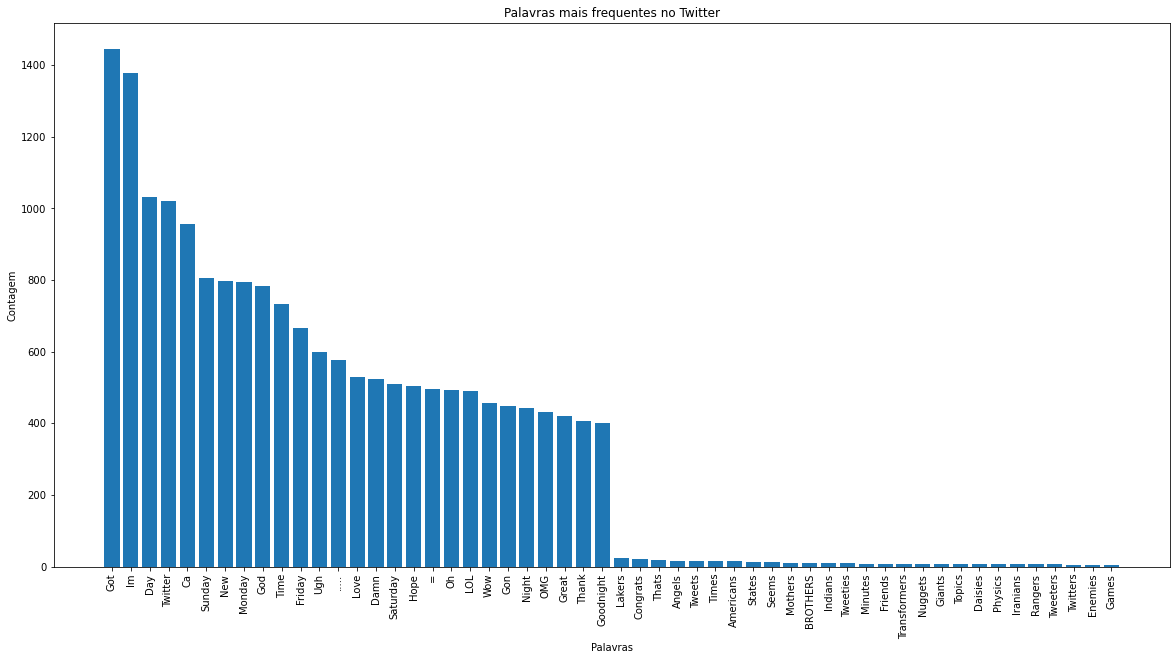

In [150]:
import matplotlib.pyplot as plt

# Cria o gráfico de barras
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df_sorted['WORD'], df_sorted['COUNT'])

# Define o título do gráfico e dos eixos
ax.set_title('Palavras mais frequentes no Twitter')
ax.set_xlabel('Palavras')
ax.set_ylabel('Contagem')

# Rotaciona as labels do eixo x em 45 graus

plt.xticks(rotation=90) # rotacionando os labels do eixo x
# Mostra o gráfico
plt.show()


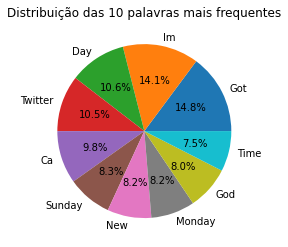

In [151]:
import matplotlib.pyplot as plt

# Obter as 10 palavras mais frequentes
df_top10 = df_sorted.head(10)

# Criar gráfico de pizza
plt.pie(df_top10['COUNT'], labels=df_top10['WORD'], autopct='%1.1f%%')
plt.title('Distribuição das 10 palavras mais frequentes')
plt.show()


In [152]:
df_sorted.to_csv('palavras.cvc',index=False)